In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [3]:
num_schemes = 5
num_lengthes = 4

In [4]:
I = np.empty((num_lengthes, num_schemes))
U = np.empty((num_lengthes, num_schemes))
l = np.empty(num_lengthes)
for j in range(num_schemes):
    df = pd.read_csv(f'schemes/{j + 1}.csv')
    I[:, j] = df.loc[:, 'I']
    U[:, j] = df.loc[:, 'U']
    l[:] = df.loc[:, 'l']

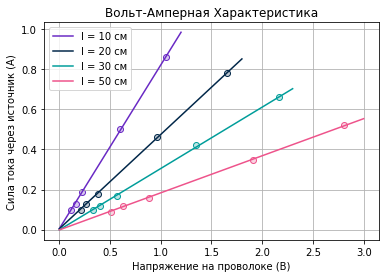

In [5]:
fig, ax = plt.subplots()
ax.set_title('Вольт-Амперная Характеристика')
ax.set_ylabel('Сила тока через источник (А)')
ax.set_xlabel('Напряжение на проволоке (В)')
ax.grid()

colors = ['#6929c4', '#012749', '#009d9a', '#ee538b']
for i in range(num_lengthes):
    k, b = np.polyfit(U[i], I[i], 1)
    x = np.arange(max(U[i]) + 0.2, step=0.1)
    ax.plot(x, k * x + b, color=colors[i],
            label=f'l = {round(l[i])} см')
    ax.scatter(U[i], I[i], c=colors[i] + '40', edgecolors=colors[i])
ax.legend()
pass

In [43]:
df = pd.read_csv('diameter.csv')
d = df.loc[:, 'd'].mean()
d = d / 1_000
print(d)

0.358


In [45]:
from math import pi

L = l / 100

def ivity(R):
    return np.array([R[i] * pi * d ** 2 / 4 / L[i] for i in range(num_lengthes)])

In [46]:
R_schemes = [(U[i] / I[i]).mean() for i in range(num_lengthes)]
rho_schemes = ivity(R_schemes)

In [47]:
df = pd.read_csv('bridge.csv')
R_bridge = df.loc[:, 'R']
rho_bridge = ivity(R_bridge)

In [48]:
deviation = 0.0000025

In [49]:
pd.DataFrame({'Схемы': R_schemes, 'Мост': R_bridge, 'Отклонение': np.abs(R_schemes - R_bridge)})

,Схемы,Мост,Отклонение
0,1.201919,1.5150,0.313081
1,2.082690,2.1175,0.034810
2,3.297688,3.2951,0.002588
3,5.455531,5.4137,0.041831


pho = 1.156134865421346


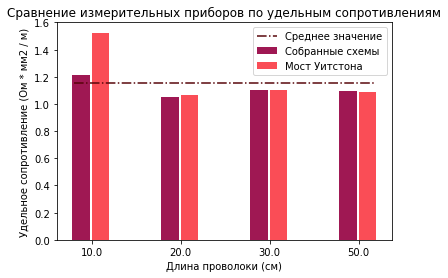

In [51]:
fig, ax = plt.subplots()

ax.set_title('Сравнение измерительных приборов по удельным сопротивлениям')
ax.set_ylabel('Удельное сопротивление (Ом * мм2 / м)')
ax.set_xlabel('Длина проволоки (см)')

width = 0.2
x = np.arange(num_lengthes)

ax.set_xticks(x)
ax.set_xticklabels(l)

colors = ['#9f1853', '#fa4d56', '#570408']
ax.bar(x - width/2 - 0.02, rho_schemes, width=width, color=colors[0], label='Собранные схемы')
ax.bar(x + width/2, rho_bridge, width=width, color=colors[1], label='Мост Уитстона')

mean = np.concatenate((rho_schemes, rho_bridge)).mean()
print(f'pho = {mean}')
ax.hlines(mean, 0 - width, 3 + width, colors=colors[2], linestyles='dashdot', label='Среднее значение')
# ax.hlines(mean + deviation, 0 - width, 3 + width, colors=colors[3], linestyles='dashed')
# ax.hlines(mean - deviation, 0 - width, 3 + width, colors=colors[3], linestyles='dashed')

ax.legend()

pass